In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("/home/miri/Documents/bachelorthesis/plots")
from plot_utils import *

data_path = "../data/adam_wobn"
image_path = "./images/adam_wobn"

/home/miri/Documents/bachelorthesis/plots/plot_utils.py:595: SyntaxWarning: invalid escape sequence '\m'
  axs[0].set_title("Cosine Similarity of Adam running average $\mu_{adam}$ and calculated $\mu_{calc}$",font={'weight' : 'normal'})
/home/miri/Documents/bachelorthesis/plots/plot_utils.py:628: SyntaxWarning: invalid escape sequence '\m'
  axs.set_title("Cosine Similarity of SgdM running average $\mu_{sgdm}$ and calculated $\mu_{calc}$",font={'weight' : 'normal'})


2025-03-11 13:10:03.653148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-11 13:10:03.663713: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-11 13:10:03.666538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 13:10:04.230132: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [4]:
lr_fn = lambda js : js["optimizer"]["lr"]
p_fn = lambda js : js["norm"]["norm_multiply"]
wd_fn = lambda js : js["optimizer"]["lambda_wd"]
get_hyperparam_best_acc(data_path,
                        ["noreg","norm","cnorm","cnormu","gcstdu","wd"],
                        [lr_fn,p_fn,p_fn,p_fn,p_fn,wd_fn])

Best of noreg is 0.0002 & 82.1\%
Best of norm is 1.4 & 86.23\%
Best of cnorm is 1.4 & 84.3\%
Best of cnormu is 1.2 & 85.61\%
Best of gcstdu is 1.2 & 85.42\%
Best of wd is 8e-05 & 82.22\%


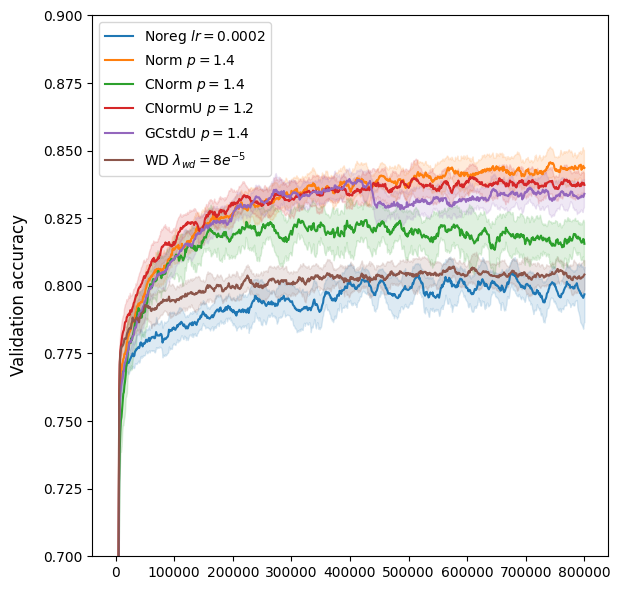

In [ ]:
fig,axs = plot_wobn_best_hyperparameter_validation_curve(data_path,image_path,
                                               ["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                                               [r"Noreg $lr = 0.0002$", r"Norm $p=1.4$", r"CNorm $p=1.4$", r"CNormU $p=1.2$", r"GCstdU $p=1.4$",r"WD $\lambda_{wd}=8e^{-5}$"],
                                               [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],
                                               800000)
fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/best_hyperparameter_validation_accuracy.png", bbox_inches='tight',dpi=600)

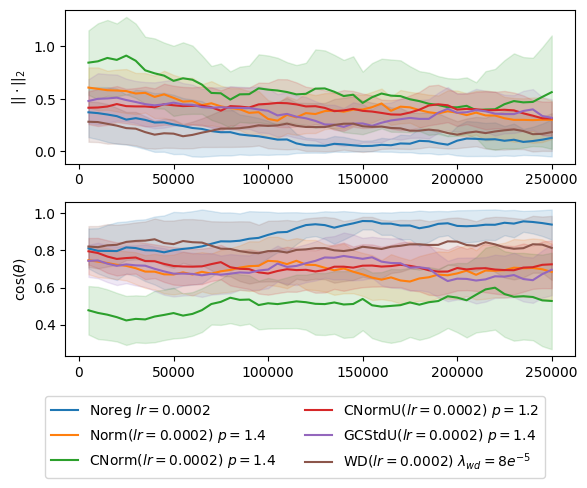

In [ ]:
fig,axs = distribution_drift(data_path,["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                             [r"Noreg $lr=0.0002$","Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$",r"WD($lr=0.0002$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/ics.png", bbox_inches='tight',dpi=600)

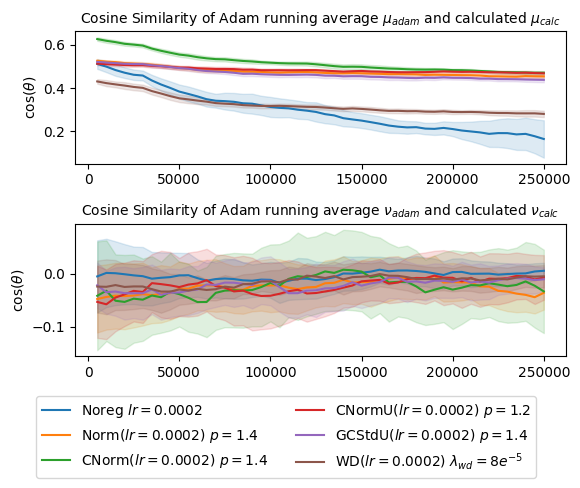

In [ ]:
fig,axs = adam_drift(data_path,["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                             ["Noreg $lr=0.0002$","Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$",r"WD($lr=0.0002$) $\lambda_{wd}=8e^{-5}$"],
                             [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]])

fig.set_size_inches(6,4)
fig.tight_layout()
fig.savefig(f"{image_path}/adam_drift.png", bbox_inches='tight',dpi=600)

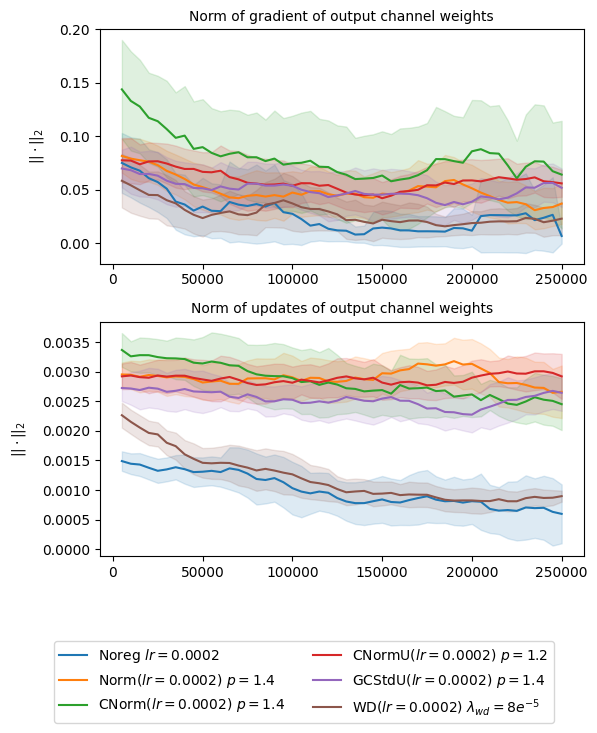

In [ ]:

fig,axs = gradients_and_updates(data_path,["noreg/0.0002","norm/1.4_1","cnorm/1.4_1","cnormu/1.2_1","gcstdu/1.4_1","wd/8e-05"],
                     [r"Noreg $lr=0.0002$","Norm($lr=0.0002$) $p=1.4$","CNorm($lr=0.0002$) $p=1.4$","CNormU($lr=0.0002$) $p=1.2$","GCStdU($lr=0.0002$) $p=1.4$",r"WD($lr=0.0002$) $\lambda_{wd}=8e^{-5}$"],
                     [colors["noreg"],colors["norm"],colors["cnorm"],colors["cnormu"],colors["gcstdu"],colors["wd"]],"mg_spacing_0",layer="conv|out")

fig.set_size_inches(6,6)
fig.tight_layout()
fig.savefig(f"{image_path}/grad_and_update_norm.png", bbox_inches='tight',dpi=600)
